## Walmart MLE Evaluation - Predictive Maintenance

### Data processing

In [1]:
import pandas as pd

In [ ]:
# Get information from failures, telemetry, and machines files.
failures_data = pd.read_csv('data/PdM_failures.csv')
telemetry_data = pd.read_csv('data/PdM_telemetry.csv')
machines_data = pd.read_csv('data/PdM_machines.csv')

In [7]:
failures_data.head()

datetime  machineID failure
0  2015-01-05 06:00:00          1   comp4
1  2015-03-06 06:00:00          1   comp1
2  2015-04-20 06:00:00          1   comp2
3  2015-06-19 06:00:00          1   comp4
4  2015-09-02 06:00:00          1   comp4

In [8]:
telemetry_data.head()

datetime  machineID        volt      rotate    pressure  \
0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2  2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3  2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4  2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511

In [9]:
machines_data.head()

machineID   model  age
0          1  model3   18
1          2  model4    7
2          3  model3    8
3          4  model3    7
4          5  model3    2

The information is merged into a unique dataframe joining by datetime and machine ID. It is expected two states: Machine Failed and Machine qith no failures.

In [10]:
merged_df = pd.merge(telemetry_data, failures_data, on=['datetime', 'machineID'], how='left')

In [18]:
merged_df[merged_df['failure'].isna()]

datetime  machineID        volt      rotate    pressure  \
0       2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1       2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2       2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3       2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4       2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   
...                     ...        ...         ...         ...         ...   
876137  2016-01-01 02:00:00        100  179.438162  395.222827  102.290715   
876138  2016-01-01 03:00:00        100  189.617555  446.207972   98.180607   
876139  2016-01-01 04:00:00        100  192.483414  447.816524   94.132837   
876140  2016-01-01 05:00:00        100  165.475310  413.771670  104.081073   
876141  2016-01-01 06:00:00        100  171.336037  496.096870   79.095538   

        vibration failure  
0       45.087686     NaN  
1       43.413973     NaN  
2       34.178847     NaN  
3       41.122144     NaN  
4       25.990511     NaN  
...           ...     ...  
876137  50.771941     NaN  
876138  35.123072     NaN  
876139  48.314561     NaN  
876140  44.835259     NaN  
876141  37.845245     NaN  

[875381 rows x 7 columns]

In [19]:
merged_machines = pd.merge(merged_df, machines_data, on=['machineID'], how='left')

To get a balanced dataset, it is selected randomly the same number of entries for machines with no failures than with failures.

In [27]:
import random
with_failures = merged_machines[merged_machines['failure'].notna()]
df = merged_machines[merged_machines['failure'].isna()]
index = random.sample(range(len(df)), len(with_failures))
no_failures = df.iloc[index]

In [28]:
no_failures

datetime  machineID        volt      rotate    pressure  \
696875  2015-07-17 02:00:00         80  163.760708  342.572070   85.788053   
215154  2015-07-23 07:00:00         25  199.126787  413.395231  111.528256   
37806   2015-04-26 07:00:00          5  177.948385  442.454987  107.282176   
531203  2015-08-19 01:00:00         61  151.224947  445.273182  102.268474   
235284  2015-11-08 22:00:00         27  179.999947  462.452023  111.896135   
...                     ...        ...         ...         ...         ...   
854719  2015-07-22 18:00:00         98  165.698891  445.790227   95.769015   
366025  2015-10-11 14:00:00         42  166.896769  417.019457   98.439760   
291341  2015-04-03 04:00:00         34  184.420212  474.747152   94.099777   
357318  2015-10-13 20:00:00         41  177.198284  440.995760   85.301947   
512334  2015-06-23 22:00:00         59  158.544151  482.109918  112.180910   

        vibration failure   model  age  
696875  34.674492     NaN  model3    6  
215154  46.651591     NaN  model4   16  
37806   41.941368     NaN  model3    2  
531203  32.829367     NaN  model4    2  
235284  40.883149     NaN  model3    9  
...           ...     ...     ...  ...  
854719  43.875798     NaN  model2   20  
366025  39.135546     NaN  model1    7  
291341  40.181061     NaN  model4   10  
357318  35.096376     NaN  model4    9  
512334  36.046204     NaN  model3   17  

[761 rows x 9 columns]

In [29]:
with_failures

datetime  machineID        volt      rotate    pressure  \
96      2015-01-05 06:00:00          1  179.303153  499.777962  111.833028   
1536    2015-03-06 06:00:00          1  198.257975  456.862342   89.333995   
2616    2015-04-20 06:00:00          1  180.050801  346.362480  105.661164   
4056    2015-06-19 06:00:00          1  187.673963  493.005160  105.334392   
5856    2015-09-02 06:00:00          1  144.094532  409.380150  106.720871   
...                     ...        ...         ...         ...         ...   
866588  2015-11-29 06:00:00         99  205.336154  398.728678  116.164197   
866948  2015-12-14 06:00:00         99  152.143212  394.182739  114.212265   
868389  2015-02-12 06:00:00        100  226.666914  484.516473   97.521897   
873429  2015-09-10 06:00:00        100  201.781023  520.820195   90.944571   
875589  2015-12-09 06:00:00        100  144.720190  377.188361  109.995936   

        vibration failure   model  age  
96      52.383097   comp4  model3   18  
1536    38.671900   comp1  model3   18  
2616    39.218055   comp2  model3   18  
4056    53.963961   comp4  model3   18  
5856    57.454990   comp4  model3   18  
...           ...     ...     ...  ...  
866588  35.588661   comp3  model1   14  
866948  40.852043   comp4  model1   14  
868389  53.129437   comp1  model4    5  
873429  39.066892   comp1  model4    5  
875589  28.433400   comp2  model4    5  

[761 rows x 9 columns]

In [ ]:
dataset = pd.concat([no_failures, with_failures], ignore_index=True)
dataset_y = dataset['failure']
dataset_x = dataset[['machineID', 'volt', 'rotate', 'pressure', 'vibration']]
dataset_x

machineID        volt      rotate    pressure  vibration
0            80  163.760708  342.572070   85.788053  34.674492
1            25  199.126787  413.395231  111.528256  46.651591
2             5  177.948385  442.454987  107.282176  41.941368
3            61  151.224947  445.273182  102.268474  32.829367
4            27  179.999947  462.452023  111.896135  40.883149
...         ...         ...         ...         ...        ...
1517         99  205.336154  398.728678  116.164197  35.588661
1518         99  152.143212  394.182739  114.212265  40.852043
1519        100  226.666914  484.516473   97.521897  53.129437
1520        100  201.781023  520.820195   90.944571  39.066892
1521        100  144.720190  377.188361  109.995936  28.433400

[1522 rows x 5 columns]

The two states are maped to0 and 1:
0: Machine no failure.
1: Machine failed.

In [ ]:
# Track Data Version
dataset_s = dataset
dataset_s['failure'] = dataset_s['failure'].notna().astype(int).replace({0: 0, 1: 1})
dataset_s.to_csv('data/PdM_Dataset_Merged.csv', index=False)

In [41]:
dataset_y = dataset_y.notna().astype(int).replace({0: 0, 1: 1})
dataset_y

0       0
1       0
2       0
3       0
4       0
       ..
1517    1
1518    1
1519    1
1520    1
1521    1
Name: failure, Length: 1522, dtype: int64

The dataset is split and the datasets are tracked with DVC.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
dataset = pd.read_csv('data/PdM_Dataset_Merged.csv')
dataset_y = dataset['failure']
dataset_x = dataset[['machineID', 'volt', 'rotate', 'pressure', 'vibration']]
x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, train_size=0.8, shuffle=True)

In [ ]:
x_train.to_csv('data/training/x_train.csv', index=False)
y_train.to_csv('data/training/y_train.csv', index=False)
x_test.to_csv('data/test/x_test.csv', index=False)
y_test.to_csv('data/test/y_test.csv', index=False)

In [2]:
# Read data from version
x_train = pd.read_csv('data/training/x_train.csv')
y_train = pd.read_csv('data/training/y_train.csv')
x_test = pd.read_csv('data/test/x_test.csv')
y_test = pd.read_csv('data/test/y_test.csv')
y_test

Unnamed: 0  failure
0           187        0
1          1474        1
2          1475        1
3           936        1
4          1453        1
..          ...      ...
300         929        1
301         169        0
302        1185        1
303         252        0
304        1259        1

[305 rows x 2 columns]

In [3]:
x_train.columns = ['X','machineID','volt','rotate','pressure','vibration']
y_train.columns = ['X','failure']
x_test.columns = ['X','machineID','volt','rotate','pressure','vibration']
y_test.columns = ['X','failure']

x_train = x_train.drop('X', axis=1)
y_train = y_train.drop('X', axis=1)
x_test = x_test.drop('X', axis=1)
y_test = y_test.drop('X', axis=1)

y_train = y_train['failure']
y_test = y_test['failure']

x_train.to_csv('data/training/x_train_no_index.csv', index=False)
x_train

machineID        volt      rotate    pressure  vibration
0            42  143.322981  487.028911  111.889113  40.847190
1            69  156.032489  422.669792  114.749570  54.306788
2            37  193.929905  429.530809   89.848086  40.755399
3            16  177.026807  502.257658  100.630842  50.942252
4            18  165.038340  471.401270  104.317118  34.533751
...         ...         ...         ...         ...        ...
1212         47  159.544860  456.231838  115.752580  46.304162
1213         56  146.680638  360.103338  105.993856  31.252944
1214         35  165.439061  459.487276   84.850306  41.933097
1215         17  158.098828  406.325391   97.001765  59.967174
1216         19  154.705030  429.560326   98.570509  40.542377

[1217 rows x 5 columns]

In [23]:
y_train

0       1
1       1
2       0
3       0
4       0
       ..
1212    0
1213    0
1214    0
1215    1
1216    0
Name: failure, Length: 1217, dtype: int64

### Experiments - Model selection

The machine learning model's lifecycles are managed with mlflow.
- It was proposed to compare two models: Random Forest and Support Vector Machines.
- The Input Features were: machineID, volt, rotate, pressure, and vibration.
- The Output is the expectation to fail: 0 - No failures, 1 - Machine will fail.
- It was used Grid Search for fine-tuning.

The parameters tuned for each models were tracked in MLflow. The metrics verified were the accuaracy, and F1-Score. The models were versiond in ML Flow too.

In [3]:
import mlflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = {
    'criterion' : ('gini', 'entropy', 'log_loss'),
    'max_depth' : [None, 2, 5, 10],
    'max_features' : ('sqrt', 'log2', None)
}
rdmf = RandomForestClassifier()
clf = GridSearchCV(rdmf, parameters)
clf.fit(x_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [None, 2, 5, 10],
                         'max_features': ('sqrt', 'log2', None)})

In [ ]:
#!pip install evidently

  Using cached evidently-0.7.6-py3-none-any.whl (5.2 MB)
  Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
  Using cached statsmodels-0.14.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Using cached litestar-2.16.0-py3-none-any.whl (573 kB)
  Using cached typing_inspect-0.9.0-py3-none-any.whl (8.8 kB)
  Using cached watchdog-6.0.0-py3-none-manylinux2014_x86_64.whl (79 kB)
  Using cached dynaconf-3.2.11-py2.py3-none-any.whl (236 kB)
  Using cached certifi-2025.4.26-py3-none-any.whl (159 kB)
  Using cached fsspec-2025.5.1-py3-none-any.whl (199 kB)
  Using cached ujson-5.10.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (53 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached cryptography-45.0.3-cp311-abi3-manylinux_2_34_x86_64.whl (4.5 MB)
  Using cached litestar_htmx-0.4.1-py3-none-any.whl (10.0 kB)
  Using 

In [2]:
import mlflow.pyfunc
import numpy as np
from prometheus_client import Counter, Histogram, Gauge
from evidently import Report
from evidently.presets import DataDriftPreset, ClassificationPreset
from evidently import Dataset, DataDefinition, BinaryClassification


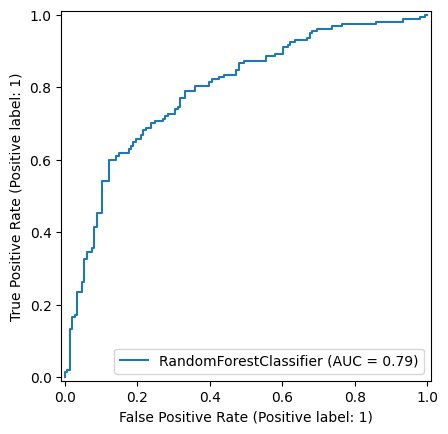

array([       inf, 0.95411507, 0.95021815, 0.92525831, 0.92305921,
       0.9111669 , 0.85601863, 0.85286595, 0.84359663, 0.8396136 ,
       0.83893161, 0.83445302, 0.81194827, 0.81130498, 0.78656426,
       0.78402182, 0.77288144, 0.76570159, 0.75618959, 0.75605294,
       0.74791487, 0.74743074, 0.71836856, 0.71622504, 0.69715356,
       0.69419146, 0.67535473, 0.6727901 , 0.64384413, 0.63222796,
       0.62604653, 0.6254936 , 0.62408535, 0.61047876, 0.60623983,
       0.60498522, 0.60359943, 0.58896507, 0.58441763, 0.58084183,
       0.57578319, 0.56764407, 0.56255311, 0.56143252, 0.55007576,
       0.54984565, 0.54917893, 0.53982913, 0.52630738, 0.51858973,
       0.51550478, 0.49299223, 0.4894439 , 0.4862017 , 0.47815341,
       0.45987585, 0.45946618, 0.45457389, 0.44698325, 0.4469011 ,
       0.44276387, 0.43932788, 0.42180907, 0.41924227, 0.41485832,
       0.40836352, 0.40553557, 0.39383146, 0.38774104, 0.38766137,
       0.38680619, 0.37668512, 0.37472065, 0.36769062, 0.36616

In [ ]:
rdmf = RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None)
rdmf.fit(x_train, y_train)

scores = rdmf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, scores)

from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(rdmf, x_test, y_test)
plt.show()

In [ ]:
y_train_pred = rdmf.predict(x_train)
y_test_pred = rdmf.predict(x_test)

X_train_ev = x_train
X_train_ev['prediction'] = y_train_pred
X_train_ev['target'] = y_train

X_test_ev = x_test
X_test_ev['prediction'] = y_test_pred
X_test_ev['target'] = y_test


definition = DataDefinition(
    classification=[BinaryClassification(
        target='target',
        prediction_labels='prediction')],
        categorical_columns=['target', 'prediction']
    )
X_train_ev = Dataset.from_pandas(pd.DataFrame(X_train_ev), data_definition=definition)
X_test_ev = Dataset.from_pandas(pd.DataFrame(X_test_ev), data_definition=definition)

rf_class_report = Report(metrics=[DataDriftPreset()], include_tests=True)
res = rf_class_report.run(reference_data=X_train_ev, current_data=X_test_ev)
#res = rf_class_report.run(X_test_ev, None)
#res.save_json('reports/rf_report_v1.json')
res


{'metrics': [{'id': '15e89f895b482f9b84ba7274ed18a106',
   'metric_id': 'DriftedColumnsCount(drift_share=0.5)',
   'value': {'count': 1.0, 'share': 0.14285714285714285}},
  {'id': 'b3480fbbc934602fa8855dd5528d799a',
   'metric_id': 'ValueDrift(column=machineID)',
   'value': np.float64(0.1002559059025326)},
  {'id': 'f680ff7fb0b2d14d45253c7d6a8e7a7b',
   'metric_id': 'ValueDrift(column=volt)',
   'value': np.float64(0.08802663955039229)},
  {'id': 'd046aff7a8dea6038e4c1194186e1121',
   'metric_id': 'ValueDrift(column=rotate)',
   'value': np.float64(0.05772542577669342)},
  {'id': '1516a663b8b0fa9b37a669fb6f763923',
   'metric_id': 'ValueDrift(column=pressure)',
   'value': np.float64(0.0870496637647379)},
  {'id': 'b24654c305086abd3a42a4968e2fc66e',
   'metric_id': 'ValueDrift(column=vibration)',
   'value': np.float64(0.09389211280661314)},
  {'id': '67339c5bf650af8ad00b08cbc7d1cb0a',
   'metric_id': 'ValueDrift(column=target)',
   'value': np.float64(0.013048501159463821)},
  {'id':

In [ ]:
rf_class_report = Report(metrics=[DataDriftPreset()])
res = rf_class_report.run(reference_data=x_train, current_data=model_input)
res = res.dict()
drift_metrics = res['metrics']
for result in drift_metrics:
    if 'machineID' in result['metric_id']:
        print(result['value'])
    if 'vibration' in result['metric_id']:
        print(result['value'])

In [61]:
res_ = res.dict()
res_met = res_['metrics']
v = None
for result in res_met:
    if 'machineID' in result['metric_id']:
        v = result['value']
    print(result['metric_id'], result['value'])
print(v)

DriftedColumnsCount(drift_share=0.5) {'count': 1.0, 'share': 0.14285714285714285}
ValueDrift(column=machineID) 0.1002559059025326
ValueDrift(column=volt) 0.08802663955039229
ValueDrift(column=rotate) 0.05772542577669342
ValueDrift(column=pressure) 0.0870496637647379
ValueDrift(column=vibration) 0.09389211280661314
ValueDrift(column=target) 0.013048501159463821
ValueDrift(column=prediction) 0.011903001628656236
0.1002559059025326


## Save the model from code to monitor using Prometheus and Visualize with Grafana

In [101]:
from mlflow.models.signature import infer_signature
from model import SklearnModel
import joblib

rdmf = RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None)
x_train = pd.read_csv('data/training/x_train.csv')
y_train = pd.read_csv('data/training/y_train.csv')
x_train.columns = ['X','machineID','volt','rotate','pressure','vibration']
y_train.columns = ['X','failure']
x_train = x_train.drop('X', axis=1)
y_train = y_train.drop('X', axis=1)
y_train = y_train['failure']
rdmf.fit(x_train, y_train)

joblib.dump(rdmf, 'models/sk_model.pkl')
joblib.dump(x_train, 'models/data_training.pkl')
mlflow.set_experiment('Model from code')
model_path = 'model.py'

with mlflow.start_run():
    input_example = x_test.iloc[:5].copy()
    signature = infer_signature(x_test, rdmf.predict(x_test))
    mlflow.pyfunc.log_model(
        python_model=model_path,
        artifact_path='Random_Forest_Model_Optimized_GridSearch_fromCode',
        signature=signature,
        input_example=input_example,
        artifacts={'model_path': 'models/sk_model.pkl', 'trainig_path': 'models/data_training.pkl'},
        registered_model_name='Random_Forest_Model_Optimized_GridSearch_fromCode',
        pip_requirements='requirements_model.txt'
    )

/home/ruben/Documentos/Codigos/Python/Walmart/venv_mlflow/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning:

Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.

2025/06/02 19:59:21 INFO mlflow.pyfunc: Validating input example against model signature
2025-06-02 19:59:22,822 - DEBUG - Inside machineID 0.7795858696026249
DEBUG:code_model_da6a95ff6b6c42828f98369393317036:Inside 

In [ ]:
# Build docker image for model
## !mlflow models build-docker -m runs:/986abbefb7f34f48b8c0a95dac5e7114/Random_Forest_Model_Optimized_GridSearch_fromCode -n random_forest_fromcode --enable-mlserver
## !mlflow models build-docker -m runs:/cef8945668e648b78aafb3ec0b9c0bdf/Random_Forest_Model_Optimized_GridSearch -n random_forest_sklearn --enable-mlserver


In [38]:
import json
with open('reports/rf_report_v1.json', 'r') as file:
    data = json.load(file)
metrics_results = data['metrics']

for result in metrics_results:
    print(result)

data

{'id': '15e89f895b482f9b84ba7274ed18a106', 'metric_id': 'DriftedColumnsCount(drift_share=0.5)', 'value': {'count': 1.0, 'share': 0.14285714285714285}}
{'id': 'b3480fbbc934602fa8855dd5528d799a', 'metric_id': 'ValueDrift(column=machineID)', 'value': 0.1002559059025326}
{'id': 'f680ff7fb0b2d14d45253c7d6a8e7a7b', 'metric_id': 'ValueDrift(column=volt)', 'value': 0.08802663955039229}
{'id': 'd046aff7a8dea6038e4c1194186e1121', 'metric_id': 'ValueDrift(column=rotate)', 'value': 0.05772542577669342}
{'id': '1516a663b8b0fa9b37a669fb6f763923', 'metric_id': 'ValueDrift(column=pressure)', 'value': 0.0870496637647379}
{'id': 'b24654c305086abd3a42a4968e2fc66e', 'metric_id': 'ValueDrift(column=vibration)', 'value': 0.09389211280661314}
{'id': '67339c5bf650af8ad00b08cbc7d1cb0a', 'metric_id': 'ValueDrift(column=target)', 'value': 0.013048501159463821}
{'id': 'bfc6e8246d39abff41fc2e002575d9a3', 'metric_id': 'ValueDrift(column=prediction)', 'value': 0.013048501159463821}


{'metrics': [{'id': '15e89f895b482f9b84ba7274ed18a106',
   'metric_id': 'DriftedColumnsCount(drift_share=0.5)',
   'value': {'count': 1.0, 'share': 0.14285714285714285}},
  {'id': 'b3480fbbc934602fa8855dd5528d799a',
   'metric_id': 'ValueDrift(column=machineID)',
   'value': 0.1002559059025326},
  {'id': 'f680ff7fb0b2d14d45253c7d6a8e7a7b',
   'metric_id': 'ValueDrift(column=volt)',
   'value': 0.08802663955039229},
  {'id': 'd046aff7a8dea6038e4c1194186e1121',
   'metric_id': 'ValueDrift(column=rotate)',
   'value': 0.05772542577669342},
  {'id': '1516a663b8b0fa9b37a669fb6f763923',
   'metric_id': 'ValueDrift(column=pressure)',
   'value': 0.0870496637647379},
  {'id': 'b24654c305086abd3a42a4968e2fc66e',
   'metric_id': 'ValueDrift(column=vibration)',
   'value': 0.09389211280661314},
  {'id': '67339c5bf650af8ad00b08cbc7d1cb0a',
   'metric_id': 'ValueDrift(column=target)',
   'value': 0.013048501159463821},
  {'id': 'bfc6e8246d39abff41fc2e002575d9a3',
   'metric_id': 'ValueDrift(column=

/home/ruben/Documentos/Codigos/Python/Walmart/venv_mlflow/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'Random_Forest_Model_Optimized_GridSearch' already exists. Creating a new version of this model...
Created version '3' of model 'Random_Forest_Model_Optimized_GridSearch'.


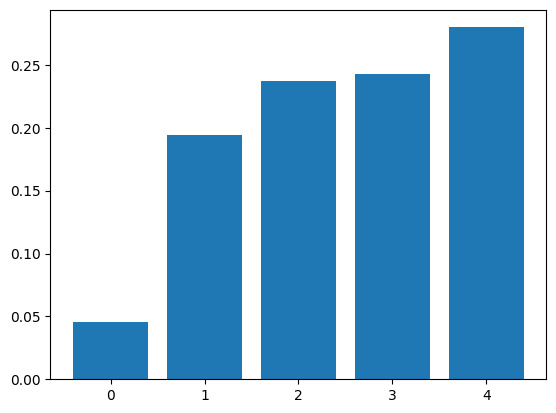

In [37]:
import mlflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import mlflow.sklearn
import matplotlib.pyplot as plt
from mlflow.models.signature import infer_signature

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

try:
    experiment_id = mlflow.create_experiment("Machine_Failure_Prediction_Random_Forest_optim")
except mlflow.exceptions.MlflowException:
    experiment_id = mlflow.get_experiment_by_name("Machine_Failure_Prediction_Random_Forest_optim").experiment_id

mlflow.set_experiment("Machine_Failure_Prediction_Random_Forest_optim")
with mlflow.start_run(run_name='RandomForest_Optimal_GridSearch'):
    mlflow.log_param('crierion', 'entropy')
    mlflow.log_param('max_depth', 5)
    mlflow.log_param('max_features', 'None')
    
    rdmf = RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None)
    rdmf.fit(x_train, y_train)
    
    y_pred = rdmf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    rep = classification_report(y_test, y_pred, target_names=['no_failures', 'with_failures'], output_dict=True)
    
    mlflow.log_metric('accuracy', acc)
    mlflow.log_metric('0_f1_score:', rep['no_failures']['f1-score'])
    mlflow.log_metric('1_f1_score:', rep['with_failures']['f1-score'])

    input_example = x_test.iloc[:5].copy()
    signature = infer_signature(x_test, rdmf.predict(x_test))
    mlflow.sklearn.log_model(
        sk_model=rdmf, 
        artifact_path='Random_Forest_Model_Optimized_GridSearch',
        signature=signature,
        input_example=input_example,
        registered_model_name='Random_Forest_Model_Optimized_GridSearch'
        )
    importances = rdmf.feature_importances_
    plt.bar(range(len(importances)), importances)
    plt.savefig('graphs/RF_feature_importances.png')
    mlflow.log_artifact('graphs/RF_feature_importances.png')


In [24]:
print(type(rep))

<class 'str'>


In [31]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel' : ('linear', 'rbf', 'sigmoid'),
    'decision_function_shape' : ('ovo', 'ovr')
}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'decision_function_shape': ('ovo', 'ovr'),
                         'kernel': ('linear', 'rbf', 'sigmoid')})

In [ ]:
import mlflow
from sklearn import svm
from sklearn.model_selection import GridSearchCV

try:
    experiment_id = mlflow.create_experiment("Machine_Failure_Prediction_SVM_optim")
except mlflow.exceptions.MlflowException:
    experiment_id = mlflow.get_experiment_by_name("Machine_Failure_Prediction_SVM_optim").experiment_id
mlflow.set_experiment("Machine_Failure_Prediction_SVM_optim")
with mlflow.start_run(run_name='SVM_Optimal_GridSearch'):
    mlflow.log_param('decision_function_shape', 'ovo')
    mlflow.log_param('kernel', 'linear')

    svc = svm.SVC(decision_function_shape='ovo', kernel='linear')
    svc.fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    rep = classification_report(y_test, y_pred, target_names=['no_failures', 'with_failures'], output_dict=True)

    mlflow.log_metric('accuracy', acc)
    mlflow.log_metric('0_f1_score:', rep['no_failures']['f1-score'])
    mlflow.log_metric('1_f1_score:', rep['with_failures']['f1-score'])

    input_example = x_test.iloc[:5].copy()
    signature = infer_signature(x_test, svc.predict(x_test))
    mlflow.sklearn.log_model(
        sk_model=svc, 
        artifact_path='SVM_Model_Optimized_GridSearch',
        signature=signature,
        input_example=input_example,
        registered_model_name='SVM_Model_Optimized_GridSearch'
        )

In [29]:
data_test

machineID        volt      rotate   pressure  vibration
293         24  157.213575  409.684608  90.346195  41.057779

The model with the best performance (Random Forest) were deployed using a docker image.

In [3]:
import encodeV2
import random
import pandas as pd
import json

BATCH_SIZE = 1

BATCH_SIZE = 2
x_test = pd.read_csv('data/test/x_test.csv')
x_test.columns = ['X','machineID','volt','rotate','pressure','vibration']
x_test = x_test.drop('X', axis=1)
data_test = x_test
index = random.sample(range(len(data_test)), BATCH_SIZE)
data_test = data_test.iloc[index]

v2_encoder = encodeV2.V2_PROTOCOL_ENCODER()
data = v2_encoder.encode(data_test)
print(data_test)
print(data_test.dtypes)
print(json.dumps(data, indent=2))

    machineID        volt      rotate    pressure  vibration
19         98  165.698891  445.790227   95.769015  43.875798
28         61  151.224947  445.273182  102.268474  32.829367
machineID      int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
dtype: object
{
  "parameters": {
    "content_type": "pd"
  },
  "inputs": [
    {
      "name": "machineID",
      "datatype": "INT64",
      "shape": [
        2
      ],
      "data": [
        98,
        61
      ]
    },
    {
      "name": "volt",
      "datatype": "FP64",
      "shape": [
        2
      ],
      "data": [
        165.698890833508,
        151.224947274367
      ]
    },
    {
      "name": "rotate",
      "datatype": "FP64",
      "shape": [
        2
      ],
      "data": [
        445.790227411965,
        445.273182222685
      ]
    },
    {
      "name": "pressure",
      "datatype": "FP64",
      "shape": [
        2
      ],
      "data": [
        95.7690148832907,
  

## Test Model Deployed

In [ ]:
import requests
import random
import json
from mlserver.codecs import PandasCodec

import encodeV2

BATCH_SIZE = 5

data_test = x_test
index = random.sample(range(len(data_test)), BATCH_SIZE)
data_test = data_test.iloc[index]

v2_encoder = encodeV2.V2_PROTOCOL_ENCODER()

#url = 'http://10.110.56.105:8080/invocations'
url = 'http://10.101.201.182:5050/v2/models/mlflow-model/infer'
#url = 'http://localhost:5050/v2/models/mlflow-model/infer'
#data = {"dataframe_split" : data_test.to_dict(orient='split', index=False)}
data = v2_encoder.encode(data_test)
header = {"Content-Type":"application/json"}
#data = json.dumps(data)
r = requests.post(
    url=url,
    data=json.dumps(data),
    headers=header
)
r.json()

{'model_name': 'mlflow-model',
 'model_version': '986abbefb7f34f48b8c0a95dac5e7114',
 'id': 'fbb180ac-ca04-496e-97ca-350294929d2c',
 'parameters': {'content_type': 'np'},
 'outputs': [{'name': 'output-1',
   'shape': [30, 1],
   'datatype': 'INT64',
   'parameters': {'content_type': 'np'},
   'data': [1,
    1,
    1,
    0,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    0,
    1,
    1,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    1,
    0,
    1,
    0,
    0,
    0,
    1,
    1,
    0]}]}

In [25]:
import requests

url = 'http://10.98.115.149:8082/metrics'
r = requests.get(url=url)
r.content

b'# HELP rest_server_requests_in_progress Total HTTP requests currently in progress\n# TYPE rest_server_requests_in_progress gauge\nrest_server_requests_in_progress{app_name="mlserver",method="POST"} 0.0\n# HELP parallel_request_queue counter of request queue size for workers\n# TYPE parallel_request_queue histogram\nparallel_request_queue_sum 36.0\nparallel_request_queue_bucket{le="0.005"} 0.0\nparallel_request_queue_bucket{le="0.01"} 0.0\nparallel_request_queue_bucket{le="0.025"} 0.0\nparallel_request_queue_bucket{le="0.05"} 0.0\nparallel_request_queue_bucket{le="0.075"} 0.0\nparallel_request_queue_bucket{le="0.1"} 0.0\nparallel_request_queue_bucket{le="0.25"} 0.0\nparallel_request_queue_bucket{le="0.5"} 0.0\nparallel_request_queue_bucket{le="0.75"} 0.0\nparallel_request_queue_bucket{le="1.0"} 1.0\nparallel_request_queue_bucket{le="2.5"} 2.0\nparallel_request_queue_bucket{le="5.0"} 5.0\nparallel_request_queue_bucket{le="7.5"} 7.0\nparallel_request_queue_bucket{le="10.0"} 8.0\nparalle

In [39]:
data

InferenceRequest(id=None, parameters=Parameters(content_type='pd', headers=None), inputs=[RequestInput(name='machineID', shape=[1, 1], datatype='INT64', parameters=None, data=TensorData(root=[3])), RequestInput(name='volt', shape=[1, 1], datatype='FP64', parameters=None, data=TensorData(root=[163.028405379678])), RequestInput(name='rotate', shape=[1, 1], datatype='FP64', parameters=None, data=TensorData(root=[450.251000049122])), RequestInput(name='pressure', shape=[1, 1], datatype='FP64', parameters=None, data=TensorData(root=[83.7007871444199])), RequestInput(name='vibration', shape=[1, 1], datatype='FP64', parameters=None, data=TensorData(root=[40.5095007496587]))], outputs=None)

In [34]:
data_test

machineID       volt      rotate  pressure  vibration
199          5  182.35883  426.861048  86.76539  39.130291

In [70]:
data_test_ = data_test.drop('expected', axis=1)
data_test_

machineID        volt      rotate    pressure  vibration
96          98  154.125119  343.460135   85.853673  46.107801
284         20  163.691941  404.112762   86.666118  44.646155
214         20  174.028704  446.032164  113.361477  33.206603
111         94  181.657783  430.537606  114.618515  22.837285
191          7  175.254720  348.039747   87.590605  50.086116

In [84]:
rf_class_report = Report(metrics=[DataDriftPreset()])
res = rf_class_report.run(reference_data=x_train, current_data=data_test_)
res = res.dict()
drift_metrics = res['metrics']
for result in drift_metrics:
    print(result)
    if 'machineID' in result['metric_id']:
        print(result['value'])
    if 'vibration' in result['metric_id']:
        print(result['value'])

{'id': '15e89f895b482f9b84ba7274ed18a106', 'metric_id': 'DriftedColumnsCount(drift_share=0.5)', 'value': {'count': 5.0, 'share': 1.0}}
{'id': 'f680ff7fb0b2d14d45253c7d6a8e7a7b', 'metric_id': 'ValueDrift(column=volt)', 'value': np.float64(0.3870757187163309)}
{'id': 'd046aff7a8dea6038e4c1194186e1121', 'metric_id': 'ValueDrift(column=rotate)', 'value': np.float64(0.7308705094146221)}
{'id': '1516a663b8b0fa9b37a669fb6f763923', 'metric_id': 'ValueDrift(column=pressure)', 'value': np.float64(0.6055266746366548)}
{'id': 'b24654c305086abd3a42a4968e2fc66e', 'metric_id': 'ValueDrift(column=vibration)', 'value': np.float64(0.766456513207716)}
0.766456513207716
{'id': 'b3480fbbc934602fa8855dd5528d799a', 'metric_id': 'ValueDrift(column=machineID)', 'value': np.float64(0.771223103183919)}
0.771223103183919
